# Ph_bands of PbF2

In [2]:
from pymatgen.ext.matproj import MPRester
import numpy as np
import matplotlib.pyplot as plt
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure

with MPRester("rxafJw6hy0L68C4ZGJP1j4UXfbE4nmS8" ) as m:
    s= m.get_phonon_bandstructure_by_material_id("mp-315")

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bandes des phonons

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

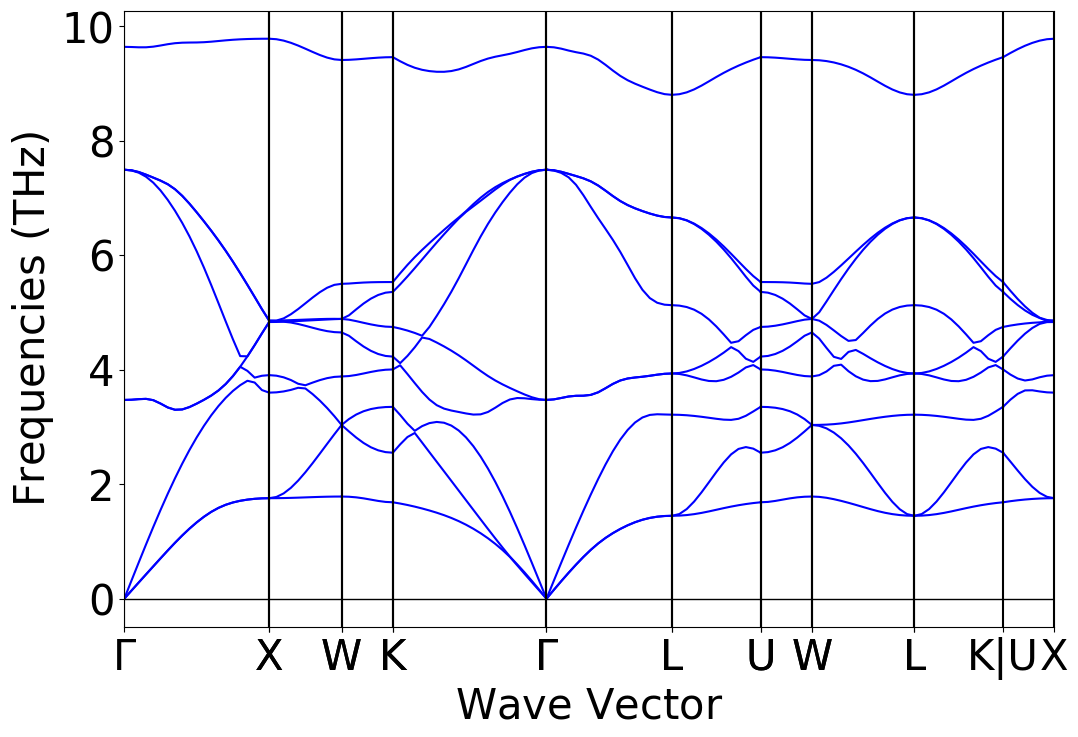

In [3]:
phononPlotter = PhononBSPlotter(s)
phononPlotter.get_plot()

# Zone de Brillouin

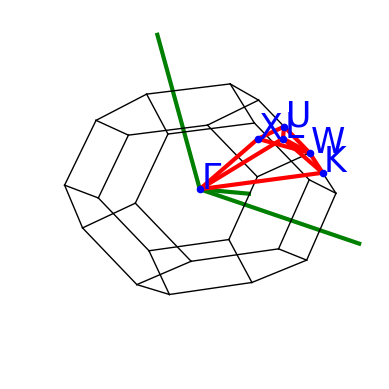

In [4]:
phononPlotter.plot_brillouin()

On va étudier la vitesse du son pour les trois branches accoustiques différentes dans les trois directions $\Gamma-X, \Gamma-K,
\Gamma-L $. On différencie les branches accoustiques des branches optiques car celles-ci ont leurs fréquences nulles au centre de la zone de Brillouin.

# Vitesse du son pour trois branches acoustiques différentes de la zone de Brillouin

Afin de calculer cette vitesse, on utilise la formule ci-dessous:

$$ v_{s}= \frac{d\omega}{dq} = \frac {2\pi df}{dq} $$

In [5]:
#récupération des informations nécessaires
x = phononPlotter.bs_plot_data() 
fq = x['frequency']
dist = x['distances']


df1= (fq[0][1][1] - fq[0][1][0])
df2= (fq[3][2][-1] - fq[3][2][-2])
df3= (fq[4][0][1] - fq[4][0][0])
dd1= (dist[0][1]-dist[0][0])
dd2= (dist[3][-1]-dist[3][-2])
dd3= (dist[4][1]-dist[4][0])



vs1= 2*np.pi*np.abs((df1*10**12)/(dd1*10**10))
vs2= 2*np.pi*np.abs((df2*10**12)/(dd2*10**10))
vs3= 2*np.pi*np.abs((df3*10**12)/(dd3*10**10))
print("Vitesse du son de la première branche selon la direction Γ−X vaut " + str(vs1) + "m/s")
print("Vitesse du son de la deuxième branche selon la direction Γ−K vaut " + str(vs2) + "m/s")
print("Vitesse du son de la troisième branche selon la direction Γ−L vaut " + str(vs3) + "m/s")



Vitesse du son de la première branche selon la direction Γ−X vaut 1685.815671079443m/s
Vitesse du son de la deuxième branche selon la direction Γ−K vaut 3681.107884576337m/s
Vitesse du son de la troisième branche selon la direction Γ−L vaut 1792.4716481933099m/s
